In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

ModuleNotFoundError: No module named 'pandas'

In [2]:
!pip install pandas


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   --------- ------------------------------ 2.6/11.5 MB 13.7 MB/s eta 0:00:01
   ------------------- -------------------- 5.5/11.5 MB 14.0 MB/s eta 0:00:01
   --------------------------- ------------ 7.9/11.5 MB 12.8 MB/s eta 0:00:01
   -------------------------------- ------- 9.4/11.5 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.5 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 10.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------- -------------------------------- 2.4/12.6 MB 11.2 MB/s eta 0:00:01
   ----------- ---------------------------- 3.7/12.6 MB 9.1 MB/s eta 0:00:01
   ---------------- ----------------------- 5.2/12.6 MB 8.2 MB/s eta 0:00:01
   -------------------- ------------------- 6.3/12.6 MB 8.2 MB/s eta 0:00:01
   ------------------------- -------------- 7.9/12.6 MB 7.5 MB/s eta 0:00:01
   -

In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install wordcloud
!pip install scikit-learn

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------- ----------------------- 3.1/7.8 MB 16.8 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 16.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 14.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 12.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------ --------------------------- 0.8/2.6 MB 4.2 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.6 MB 4.0 MB/s eta 0:00:01
   -------------------------------- ------- 2.1/2.6 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/17.3 MB ? eta -:--:--
   ---- ----------------------------------- 1.8/17.3 MB 9.2 MB/s eta 0:00:02
   ---------- --------------------

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [10]:
data = pd.read_csv("C:/Users/admin/Downloads/Instagram data.csv", encoding = 'latin1')

In [11]:
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [12]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [13]:
data = data.dropna()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


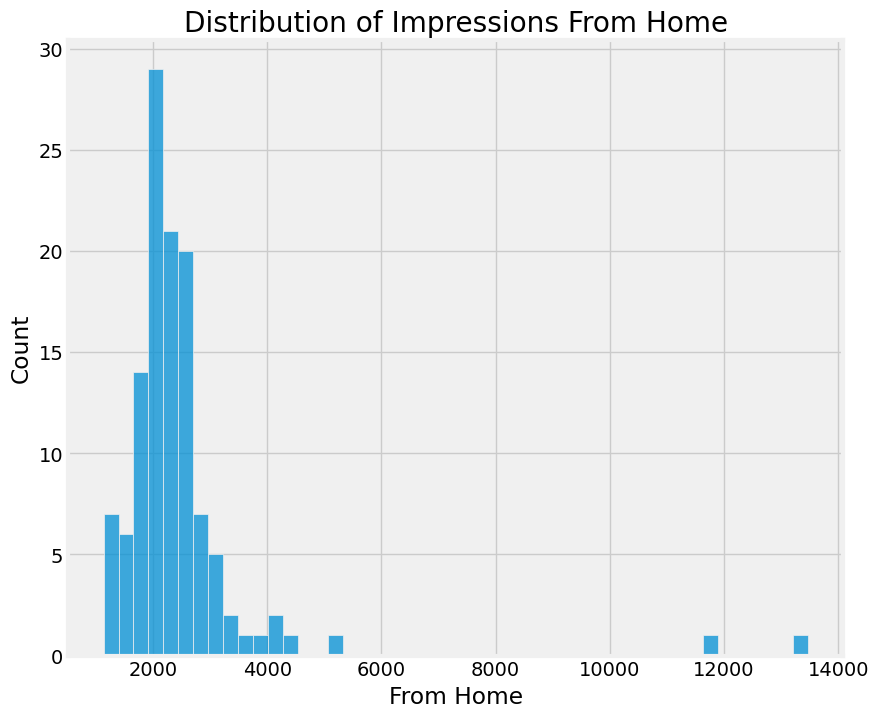

In [15]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
#sns.distplot(data['From Home'])
sns.histplot(data['From Home'])
plt.show()

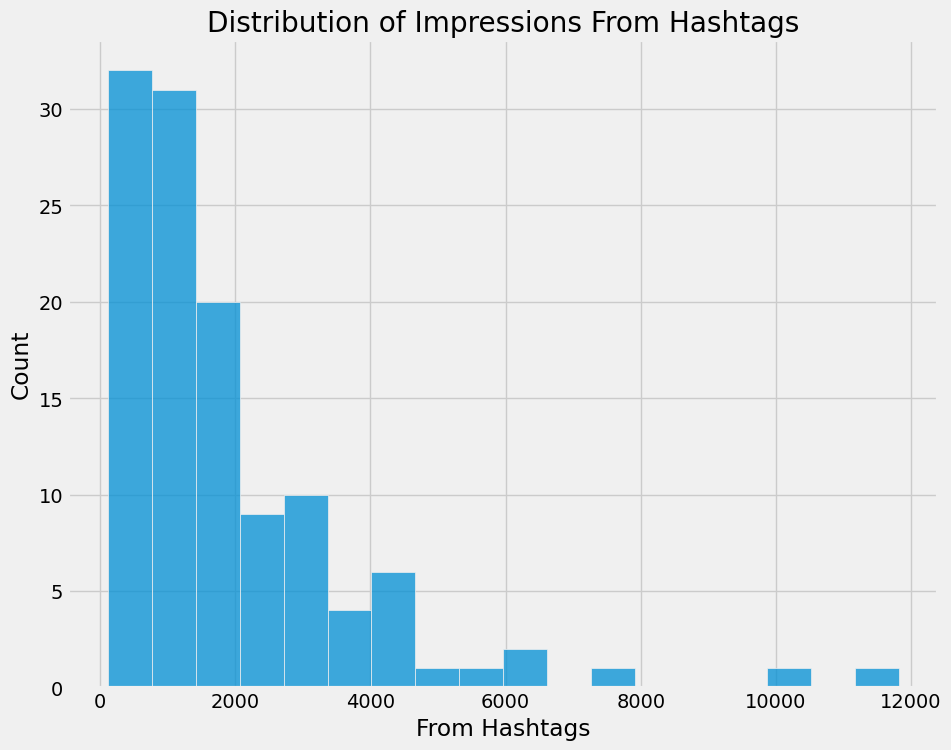

In [16]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
#sns.distplot(data['From Hashtags'])
sns.histplot(data['From Hashtags'])
plt.show()

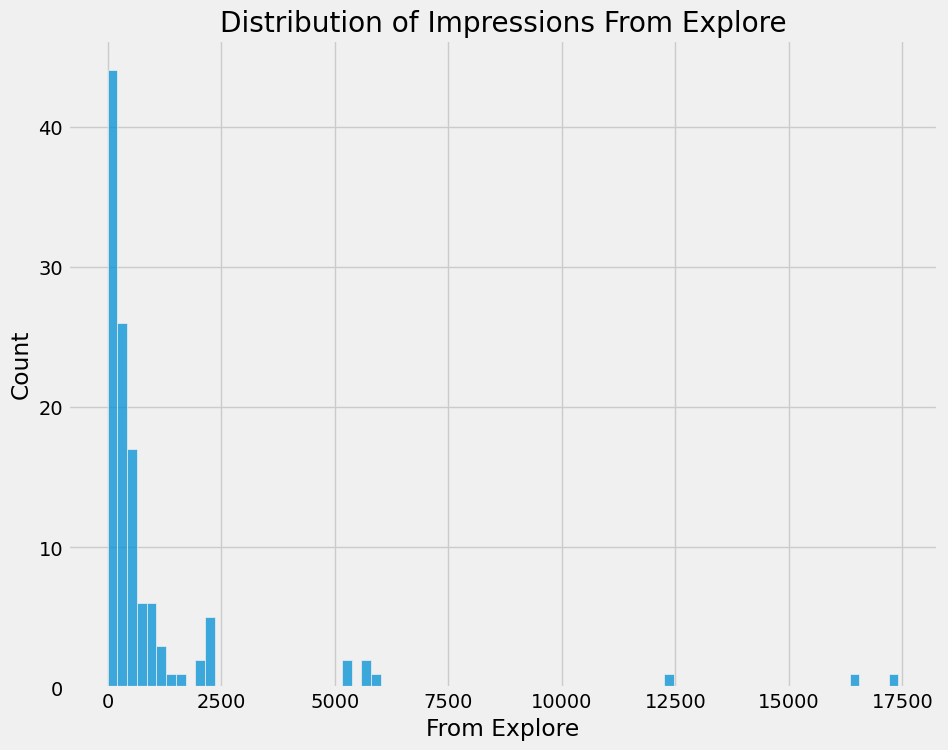

In [17]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
#sns.distplot(data['From Explore'])
sns.histplot(data['From Explore'])
plt.show()

In [18]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

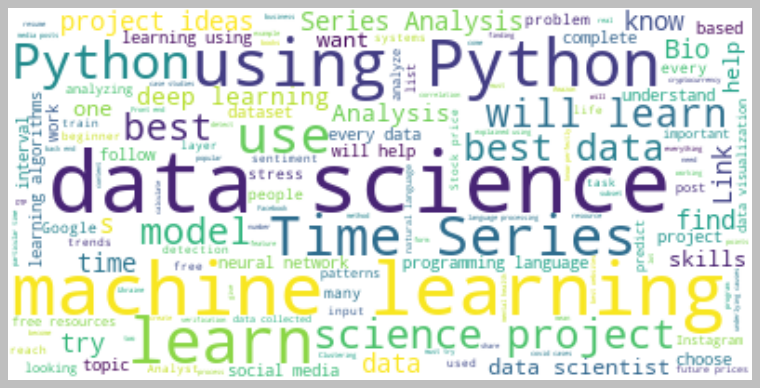

In [19]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

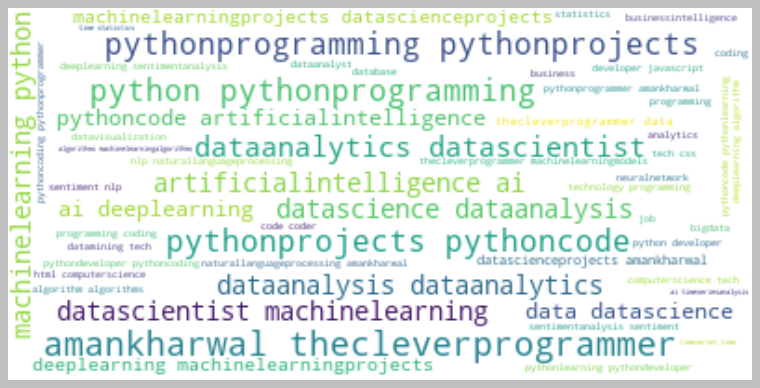

In [20]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------------- ------------------------- 3.7/9.8 MB 21.8 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 22.6 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 21.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

In [28]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

In [29]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

In [31]:
correlation = data.select_dtypes(include=[np.number]).corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [32]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [33]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()